# Import Libraries

In [67]:
import numpy as np
import pandas as pd

# Loading Dataset

In [68]:
dataset=pd.read_csv(r"D:\Datasets\brain_stroke.csv")
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# One hot encoding

In [69]:
a=pd.get_dummies(dataset,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
a

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
4977,40.0,0,0,191.15,31.1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4978,45.0,1,0,95.02,31.8,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
4979,40.0,0,0,83.94,30.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1


In [70]:
dataset["heart_disease"].unique()

array([1, 0], dtype=int64)

# Mapping

<AxesSubplot:>

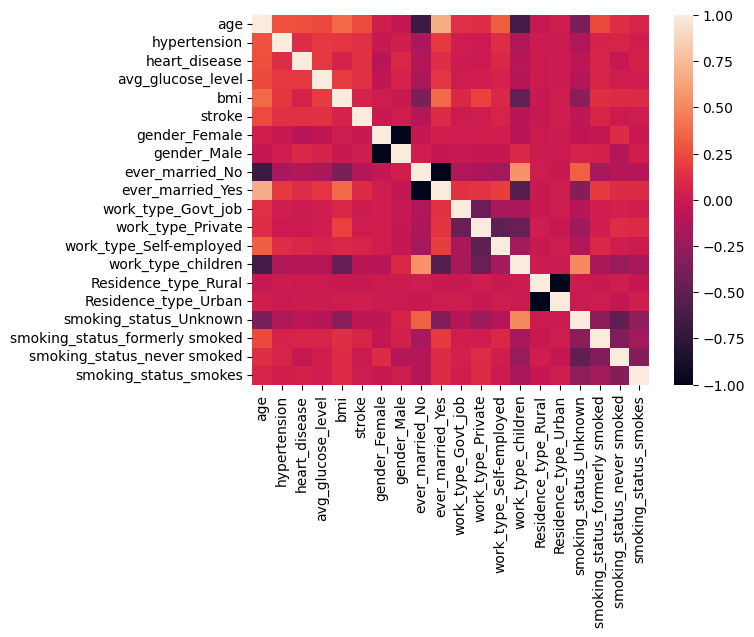

In [71]:
import seaborn as sns
sns.heatmap(a.corr())

<AxesSubplot:xlabel='age', ylabel='Count'>

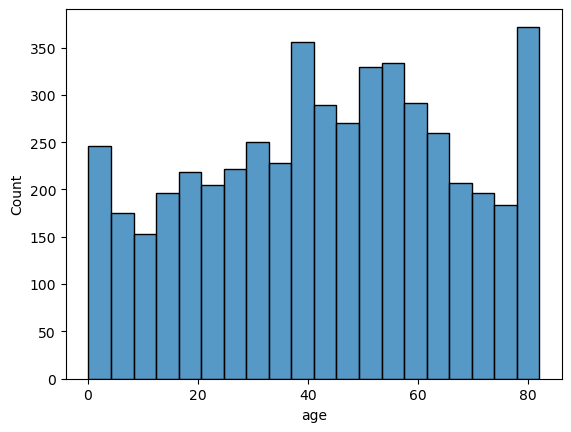

In [72]:
sns.histplot(data=a,x="age")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

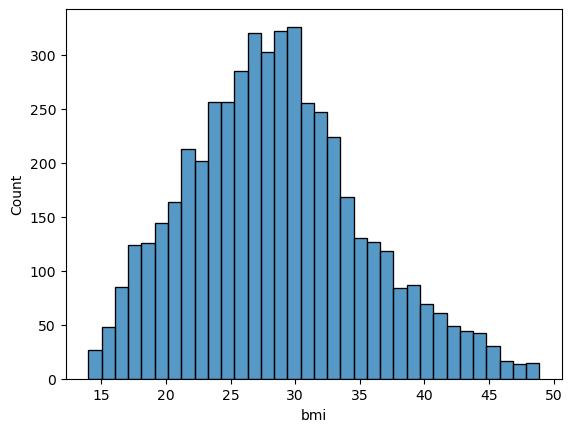

In [73]:
sns.histplot(data=a,x="bmi")

# Slicing Dataset

In [74]:
x=a.iloc[0:2000,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
x

array([[67.,  0.,  1., ...,  0.,  1.,  0.],
       [80.,  0.,  1., ...,  0.,  0.,  1.],
       [49.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 3.,  0.,  0., ...,  1.,  0.,  0.],
       [49.,  0.,  0., ...,  0.,  0.,  0.],
       [12.,  0.,  0., ...,  0.,  0.,  1.]])

In [75]:
y=a.iloc[0:2000,5].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Data Imbalancing
SMOTE

In [76]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data,y_data=sm.fit_resample(x,y)

# Feature Scaling 

In [77]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x_data,y_data)

In [78]:
from collections import Counter
print(Counter(y_data))

Counter({1: 1792, 0: 1792})


# Split for Train & Test

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,random_state=11,test_size=0.2)

# Ensemble Technique


# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

y_pred=l1.predict(x_test)
y_pred

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

78.24267782426779

# Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

y_pred1=gb.predict(x_test)
y_pred1

from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_pred1,y_test)*100
ac1

73.64016736401673

# Ensemble 

In [82]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('LogisticRegression',l1),('NaiveBayes',gb)])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('NaiveBayes', GaussianNB())])

# Predict Target Variable

In [83]:
max_vote_y_pred=vc.predict(x_test)
max_vote_y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,

# Accuracy Score

In [84]:
from sklearn.metrics import accuracy_score
ac2=accuracy_score(max_vote_y_pred,y_test)*100
ac2

77.68479776847977

# Averaging

In [86]:
y_avg=y_pred+y_pred1/2
y_avg

array([1.5, 1. , 1.5, 1.5, 1.5, 0.5, 0.5, 1.5, 0.5, 0. , 1.5, 0. , 0.5,
       0.5, 0.5, 0.5, 1.5, 1.5, 0. , 1.5, 0.5, 1. , 1.5, 0. , 0.5, 1.5,
       0. , 0. , 0.5, 1. , 0. , 0.5, 1.5, 0. , 1.5, 1.5, 0. , 0.5, 1.5,
       1.5, 1.5, 1.5, 0. , 1.5, 0. , 1.5, 0. , 1.5, 0.5, 0. , 0. , 1.5,
       0. , 0. , 1.5, 1.5, 1.5, 1.5, 0. , 0.5, 1.5, 1.5, 0. , 0. , 0.5,
       0. , 1.5, 0.5, 1.5, 1.5, 1.5, 1.5, 0. , 1.5, 0. , 0. , 0.5, 0. ,
       0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0. , 1.5, 0. , 0. , 0.5,
       1.5, 0.5, 1.5, 1.5, 1.5, 0. , 0.5, 0. , 0. , 1.5, 1.5, 1.5, 0. ,
       1.5, 0. , 0.5, 1.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 1. , 1.5, 1.5,
       1.5, 0. , 0.5, 1.5, 1.5, 0. , 1.5, 1.5, 1.5, 1.5, 0. , 0. , 1.5,
       1.5, 1. , 0. , 0. , 1.5, 1.5, 0. , 0. , 0.5, 1.5, 1.5, 0. , 1.5,
       1.5, 0. , 0. , 0.5, 0. , 1.5, 1.5, 1.5, 0. , 1.5, 1.5, 1.5, 1.5,
       0.5, 0. , 0. , 1.5, 1.5, 1.5, 1.5, 0. , 0. , 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 0.5, 1. , 1.5, 1.5, 1.5, 0. , 1.5, 0. , 1.